## RTK visualization
#### April Novak

This notebook shows that a VERA input defined with a baffle and vessel, when run through the vera_to_shift executable, does not retain the baffle or vessel in its geometric description passed into Shift. 

This notebook also shows that VERA _does_ run with the baffle and reflector defined, based on two different fission sources being provided when only the thickness of the reflector is changed.

In [1]:
import sys

import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# path to Exnihilo-specific python modules on your machine. This is a path
# on a personal machine due to the mounting to orthanc.
sys.path.insert(0, '/Users/aprilnovak/Installs/python')
sys.path.append('/Users/aprilnovak/anaconda3/lib/python3.5/')

import exnihilotools.matplotlib as extools

extools.screen_style()
%matplotlib inline

In [2]:
# for plotting tallies
from omnibus.data import plot
from matplotlib.colors import Normalize, LogNorm

In [3]:
# for plotting geometry
from geometria import RTK_Geometry
from omnibus.raytrace.colors import ColorMap
from omnibus.raytrace.imager import Imager
from omnibus.raytrace.load import load_rtk

In [4]:
path = '/Users/aprilnovak/Mounts/orthanc/projects/nkq_analysis/vera-inputs/'

## Fission source with a thick reflector
These results show that with a thick reflector (20 m of water on all sides), the fission source does change from that with a 1 cm thick water. This proves that VERA is using the baffle and reflector when running.

[[ 0.01695344  0.01798129  0.01892869  0.00747999  0.01765888]
 [ 0.01798129  0.01892869  0.00747999  0.01765888  0.01777913]
 [ 0.01892869  0.00747999  0.01765888  0.01777913  0.01851128]
 [ 0.00747999  0.01765888  0.01777913  0.01851128  0.01906932]
 [ 0.01765888  0.01777913  0.01851128  0.01906932  0.01905518]]


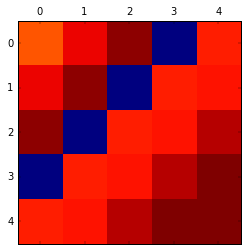

In [13]:
with h5.File(path + "baffle-vessel/baffle-vessel-thick.src-extracted.shift.h5") as f:
    source = f['strength']
    size = int(np.sqrt(source.shape[0]))
    thick_source_matrix = np.empty((size, size))
    
    for i in range(size):
        for j in range(size):
            thick_source_matrix[i][j] = source[i + j]
    
    print(thick_source_matrix)
    plt.matshow(thick_source_matrix)

## Fission source with thin barrel

[[ 0.01743757  0.01849873  0.01947991  0.00770632  0.01816968]
 [ 0.01849873  0.01947991  0.00770632  0.01816968  0.01828952]
 [ 0.01947991  0.00770632  0.01816968  0.01828952  0.01902355]
 [ 0.00770632  0.01816968  0.01828952  0.01902355  0.01959334]
 [ 0.01816968  0.01828952  0.01902355  0.01959334  0.01958926]]


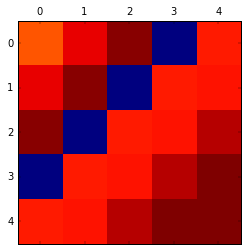

In [14]:
with h5.File(path + "baffle-vessel/baffle-vessel-thin.src-extracted.shift.h5") as f:
    source = f['strength']
    size = int(np.sqrt(source.shape[0]))
    thin_source_matrix = np.empty((size, size))
    
    for i in range(size):
        for j in range(size):
            thin_source_matrix[i][j] = source[i + j]
    
    print(thin_source_matrix)
    plt.matshow(thin_source_matrix)

[[-0.00048414 -0.00051745 -0.00055122 -0.00022633 -0.0005108 ]
 [-0.00051745 -0.00055122 -0.00022633 -0.0005108  -0.0005104 ]
 [-0.00055122 -0.00022633 -0.0005108  -0.0005104  -0.00051226]
 [-0.00022633 -0.0005108  -0.0005104  -0.00051226 -0.00052403]
 [-0.0005108  -0.0005104  -0.00051226 -0.00052403 -0.00053408]]


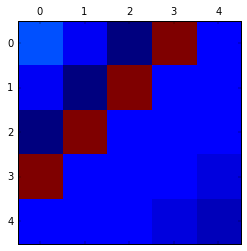

In [18]:
diff = thick_source_matrix - thin_source_matrix
print(diff)
plt.matshow(diff)